# EDA on department = 1

In this notebook, conducting the exploratory data analysis on one department only.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Load already saved data from [notebook](01_walmart_stores_sales_data_eda.ipynb)**

In [2]:
walmart = pd.read_pickle('data/w_data.pkl')

In [3]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421568 entries, 0 to 421567
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421568 non-null  int64         
 1   Dept          421568 non-null  int64         
 2   Date          421568 non-null  datetime64[ns]
 3   Weekly_Sales  421568 non-null  float64       
 4   IsHoliday     421568 non-null  category      
 5   day_name      421568 non-null  object        
 6   day_ind       421568 non-null  category      
 7   Type          421568 non-null  category      
 8   Size          421568 non-null  float64       
 9   IsWeekend     421568 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 24.1+ MB


In [4]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,day_name,day_ind,Type,Size,IsWeekend
0,1,1,2010-12-02,46039.49,True,Thursday,3,A,151315.0,False
1,1,1,2010-02-19,41595.55,False,Friday,4,A,151315.0,False
2,1,1,2010-02-26,19403.54,False,Friday,4,A,151315.0,False
3,1,1,2010-05-03,21827.90,False,Monday,0,A,151315.0,False
4,1,1,2010-12-03,21043.39,False,Friday,4,A,151315.0,False


In [5]:
'''
For Dept 1, Do all stores have sales records for all days within date range?
'''

walmart[walmart['Dept'] == 1].groupby('Store')['Store'].filter(lambda x : x.size < len(walmart['Date'].unique())).unique()

array([ 1, 45])

In [6]:
'''
For Dept 1, Do all stores have sales records for all days within date range?
If no, If we need the full series to build a forecast model, what could we do?
'''

# How do we add missing days data?



'\nFor Dept 1, Do all stores have sales records for all days within date range?\nIf no, If we need the full series to build a forecast model, what could we do?\n'

## Analysis For department one

In [7]:
'''
Logical Steps:
1. For Dept # 1, group by records by Type
2. Within each group select the maximum weekly_sale value
3. Pick the one with highest sales value
'''

walmart[walmart['Dept'] == 1].groupby('Type')['Weekly_Sales'].max()

Type
A    172225.55
B    140537.20
C     70912.01
Name: Weekly_Sales, dtype: float64

<font color='red'> Store Type A </font> has highest weekly sale

In [8]:
## Similar results but need to do extra grouping again 
# walmart[walmart['Dept'] == 1].groupby(['Store', 'Type'])['Weekly_Sales'].apply(np.max).groupby(by='Type').apply(np.max)

In [9]:
## To see weekly_sales for Dept=1 and Store=1 for type 'A' in descending order 
#walmart[(walmart['Dept'] == 1)  &  (walmart['Store'] == 1) & (walmart['Type'] == 'A')].sort_values('Weekly_Sales', ascending=False)

In [10]:
## To investigate results of group by

## groupby () by store lets us see the grouping at a granular level
## reset_index() converts multi index into single index and previous multi index columns becomes normal columns 
#temp = pd.DataFrame({'max_sale': walmart[walmart['Dept'] == 1].groupby(['Store', 'Type'])['Weekly_Sales'].
#                     apply(np.max)}).reset_index()
#temp.head()
## see sales for each Type 

#temp[temp['Type'] == 'A'].sort_values('max_sale', ascending=False)
#temp[temp['Type'] == 'B'].sort_values('max_sale', ascending=False)
#temp[temp['Type'] == 'C'].sort_values('max_sale', ascending=False)



## Visualizing results for Dept= 1

In [11]:
dept_1 = walmart[walmart['Dept'] == 1]

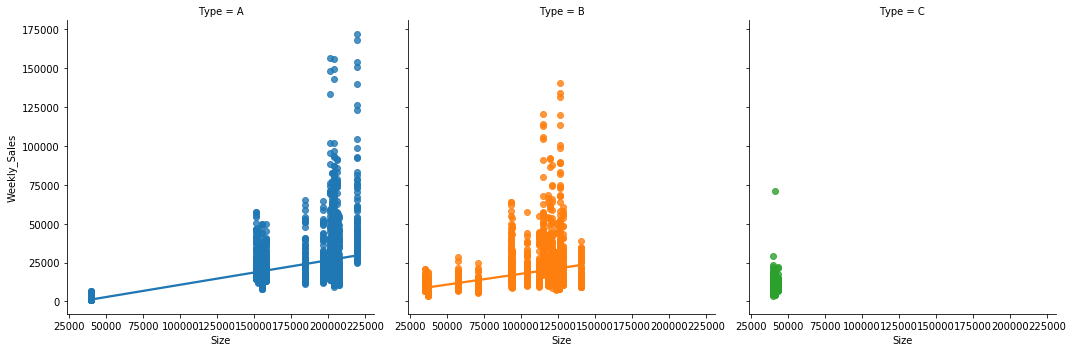

In [12]:
sns.lmplot(data=dept_1, x='Size', y='Weekly_Sales', hue='Type', col='Type')
plt.show()

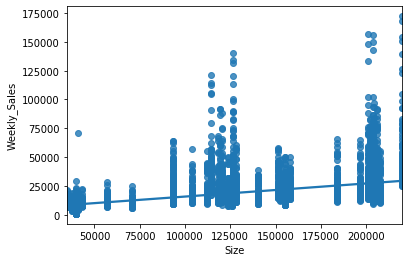

In [13]:
sns.regplot(data=dept_1, x='Size', y='Weekly_Sales')
plt.show()

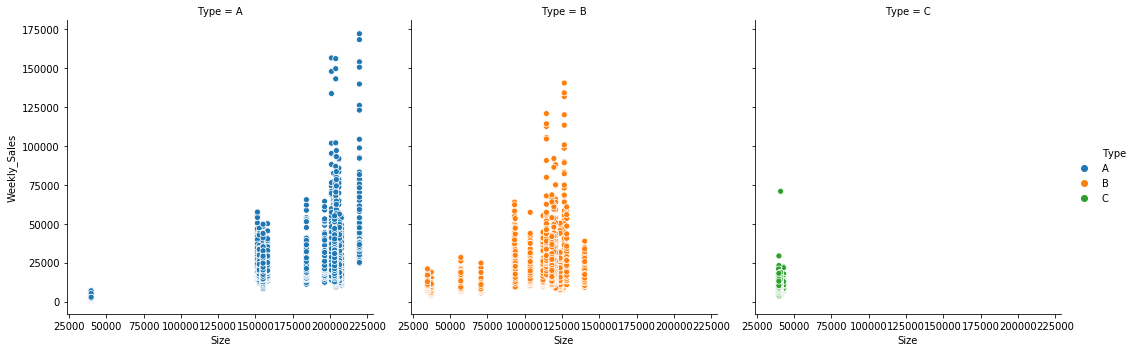

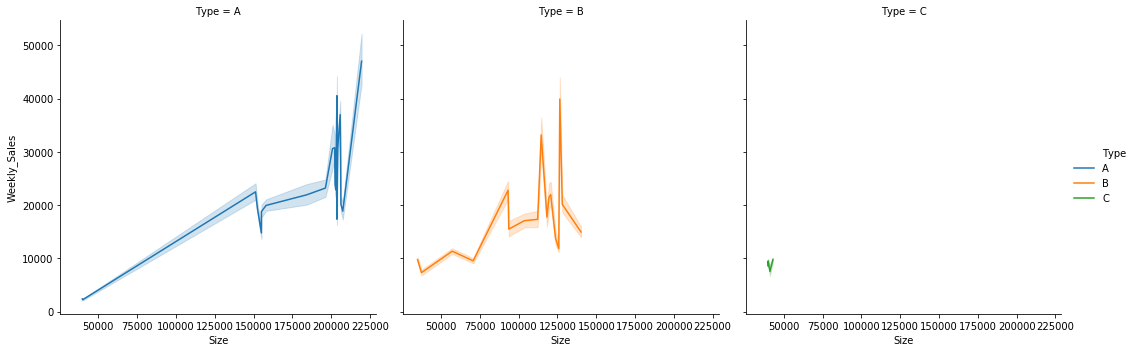

In [14]:
sns.relplot(data=dept_1,x='Size', y='Weekly_Sales', hue='Type', col='Type')
sns.relplot(data=dept_1,x='Size', y='Weekly_Sales', hue='Type', col='Type', kind='line' )
plt.show()

In [15]:
np.corrcoef(dept_1['Size'], dept_1['Weekly_Sales'])

array([[1.        , 0.47621323],
       [0.47621323, 1.        ]])

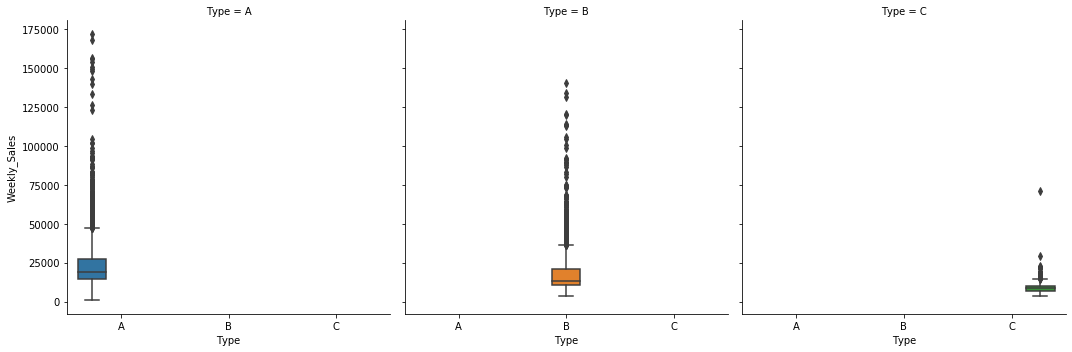

In [16]:
sns.catplot(data=dept_1, x='Type', y='Weekly_Sales', hue='Type', col='Type', kind='box')
plt.show()

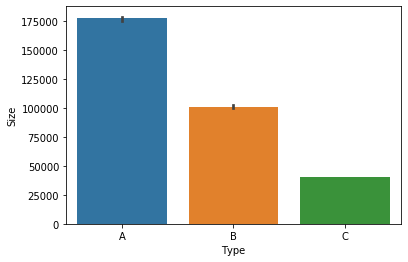

In [17]:
sns.barplot(data=dept_1, x='Type', y='Size')
plt.show()

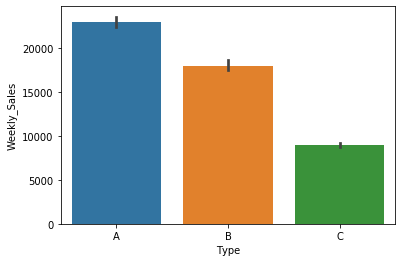

In [18]:
sns.barplot(data=dept_1, x='Type', y='Weekly_Sales')
plt.show()

## <font color='blue'> Dept-1 Conclusion </font>
- It appears that store Type 'A' has more sales compared to other Types
- It also gives impression that as store size increases, sales may increase (lmplot)
- Though coefficient of correlation (0.47) suggests that the strength of association is 'medium' 
- Further looking at box plot we see that 25-75% of data for store A and B is almost in the same range and both store A and B has a lot of outliers. Range of store 'A' data is bit higher.
- Based on this, maybe there is no *direct* relationship between store size and its weekly_sales. 

To see how its related for whole data see the notebook 1